In [1]:
import pandas as pd
import csv
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [22]:
data = pd.read_csv("data.csv")
data = data[['author', 'selftext', 'title', 'body_image']]
data.head

,author,selftext,title,body_image
0,Justasmoltowngurl,After a traumatic delivery I knew something wa...,Giving hope with my story,no
1,pocahontas_331,"Hi everyone, my name is Jess and I love in Ark...",Looking to treat my ppd through telegraphy,no
2,IntelligentChard1873,I am 22 years old and a mother three young boy...,I am struggling,no
3,Purple-Associate5695,I’m a 30yo female. I’ve had weakness and fatig...,Fatigue?,no
4,Miserable_Bug_16,"Ok, there, I said it. I hate my mother-in-law....",I hate my mother-in-law,no
...,...,...,...,...
1040,teresaistired,Just a stupid question related to this sub.\n\...,Do I really belong here?,no
1041,SomethingLikeThat74,I hadn’t noticed that I had triggers until rec...,What are your triggers for PPD?,no
1042,soft_warm_purry,With my PPD I get triggered easily by whining ...,Ear plugs helping immensely with triggers,no
1043,wizard_mundungus,I’m a mom of two boys 5 and 3 years old. I hav...,Feels like it’s never going to get better,no


In [3]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
data['selftext']=data['selftext'].apply(lambda x:expand_contractions(x))

In [4]:
#clean the data
data['cleaned']=data['selftext'].apply(lambda x: x.lower())

data['cleaned']=data['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

data['cleaned']=data['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
data['cleaned']=data['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [5]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')


# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['lemmatized'] = data['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [6]:
df_grouped=data[['body_image','lemmatized']].groupby(by='body_image').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
body_image,
no,traumatic delivery knew something wrong sure f...
yes,start man little experience areas attempting m...


In [7]:
#vectorize the data
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,abandon,abandoned,abandoning,abd,abdomen,abe,abide,abilify,ability,...,zaps,zero,zip,zippered,zippering,zoloft,zombie,zone,zoom,zulresso
body_image,,,,,,,,,,,,,,,,,,,,,
no,1,1,3,2,1,2,1,1,2,6,...,1,15,2,1,1,76,7,4,2,1
yes,0,1,1,0,0,0,0,0,0,0,...,0,2,0,0,0,8,0,0,0,0


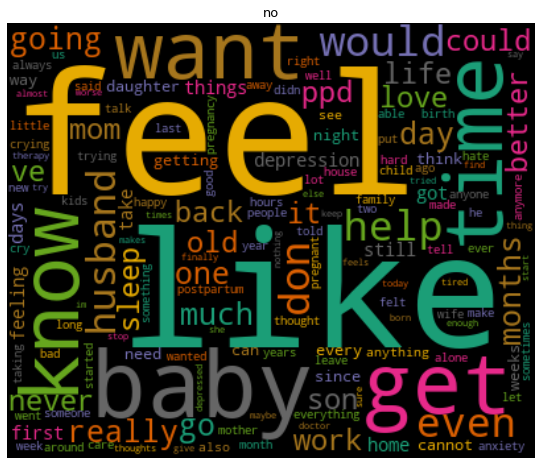

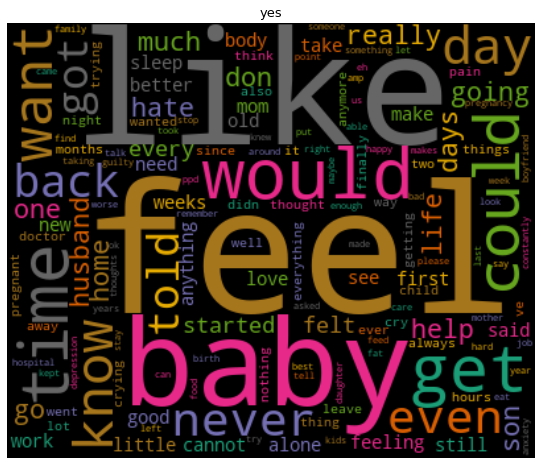

In [8]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [9]:
data = pd.read_csv("data.csv")
data = data[['author', 'selftext', 'title', 'body_image']]

In [10]:
from textblob import TextBlob
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
data['selftext'] = preprocess(data['selftext'])

data['polarity'] = data['selftext'].map(lambda text: TextBlob(text).sentiment.polarity)
data['review_len'] = data['selftext'].astype(str).apply(len)
data['word_count'] = data['selftext'].apply(lambda x: len(str(x).split()))

In [13]:
print("3 Random posts with Highest Polarity:")
for index,review in enumerate(data.iloc[data['polarity'].sort_values(ascending=False)[:3].index]['selftext']):
  print('Review {}:\n'.format(index+1),review)

3 Random posts with Highest Polarity:
Review 1:
 It's good to share the highs and lows of the week passed.  
Review 2:
 So me and my baby daddy popped out our baby on Friday. We’re here at home and he’s here for another week and it’s been good. He’s been into the baby as much as I can expect and I’ve been standing over her for hours obsessing over how perfect she is.

But what about sex? I feel like we’re never going to be like that again. And honestly I feel like even if we were it would be like “pitty sex” because he just wouldn’t want to with me looking like I do now and it’s gonna take some work. Does this ruin it forever?
Review 3:
 Working out in the gym and my jam came on and started shrugging shoulders ya know? Lean with it rock with it... 
first time feeling this good in forever, I wanna cry happy tears.


In [14]:
print("3 Random posts with Lowest Polarity:")
for index,review in enumerate(data.iloc[data['polarity'].sort_values(ascending=True)[:3].index]['selftext']):
  print('Review {}:\n'.format(index+1),review)

3 Random posts with Lowest Polarity:
Review 1:
 I hate being a stay at home mom. 
I hate that I hate being a stay at home mom.
I hate that I get upset when baby cries too much.
I hate that I can't handle the stress.
I hate that I cry every night. 
I hate that I resent my husband for wanting a child so early.
I hate that I don't feel like in bonding with my daughter.
I hate that I don't feel like I'm living, but instead I'm just surviving.
I hate that I want to die.
I hate that I feel guilty for wanting to die.
I hate the thought of losing my daughter. 
I hate that I miss life before she was born. 
I hate that I'm always tired. 
Review 2:
 Despite therapy and meds and supplements, I still get anxiety and depression. Granted it’s not as bad as it was months ago, but I am still messed up in the brain and beginning to think this will never end.
Review 3:
 As the title states I am 3.5 months in and know I chose wrong having a child, but how to come to peace with that as I unfortunately don’

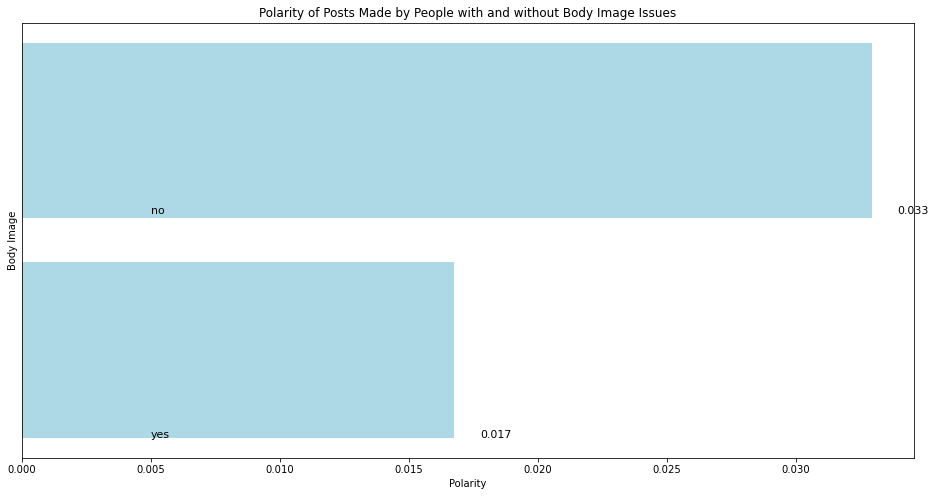

In [17]:
product_polarity_sorted=pd.DataFrame(data.groupby('body_image')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Body Image')
plt.title('Polarity of Posts Made by People with and without Body Image Issues')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='lightblue',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='black')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [24]:
import textstat
data['dale_chall_score']=data['selftext'].apply(lambda x: textstat.dale_chall_readability_score(x))
data['flesh_reading_ease']=data['selftext'].apply(lambda x: textstat.flesch_reading_ease(x))
data['gunning_fog']=data['selftext'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of Posts Without Body Image Issues=>',data[data['body_image'] == 'no']['dale_chall_score'].mean())
print('Dale Chall Score of Posts With Body Image Issues=>',data[data['body_image'] == 'yes']['dale_chall_score'].mean())

print('Flesch Reading Score of Posts Without Body Image Issues=>',data[data['body_image'] == 'no']['flesh_reading_ease'].mean())
print('Flesch Reading Score of Posts With Body Image Issues=>',data[data['body_image'] == 'yes']['flesh_reading_ease'].mean())

print('Gunning Fog Index of Posts Without Body Image Issue=>',data[data['body_image'] == 'no']['gunning_fog'].mean())
print('Gunning Fog Index of Posts With Body Image Issues=>',data[data['body_image'] == 'yes']['gunning_fog'].mean())

Dale Chall Score of Posts Without Body Image Issues=> 8.407764350453155
Dale Chall Score of Posts With Body Image Issues=> 7.936346153846154
Flesch Reading Score of Posts Without Body Image Issues=> 68.07688821752267
Flesch Reading Score of Posts With Body Image Issues=> 63.68961538461539
Gunning Fog Index of Posts Without Body Image Issue=> 12.134360523665658
Gunning Fog Index of Posts With Body Image Issues=> 15.881730769230774


In [27]:
data['text_standard']=data['selftext'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of Posts Without Body Image Issue=>',data[data['body_image'] == 'no']['text_standard'].mode())
print('Text Standard of Posts With Body Image Issues=>',data[data['body_image'] == 'yes']['text_standard'].mode())

Text Standard of Posts Without Body Image Issue=> 0    6th and 7th grade
dtype: object
Text Standard of Posts With Body Image Issues=> 0    6th and 7th grade
dtype: object
